# ACTIVIDAD DE CLASIFICACIÓN DE TEXTO

En esta actividad vamos a trabajar en clasificar textos. Se recorrerá todo el proceso desde traer el dataset hasta proceder a dicha clasificación. Durante la actividad se llevarán a cabo muchos procesos como la creación de un vocabulario, el uso de embeddings y la creación de modelos.

Las cuestiones presentes en esta actividad están basadas en un Notebook creado por François Chollet, uno de los creadores de Keras y autor del libro "Deep Learning with Python".

En este Notebook se trabaja con el dataset "Newsgroup20" que contiene aproximadamente 20000 mensajes que pertenecen a 20 categorías diferentes.

El objetivo es entender los conceptos que se trabajan y ser capaz de hacer pequeñas experimentaciones para mejorar el Notebook creado.

# Librerías

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Descarga de Datos

In [2]:
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)

17329808/17329808 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import pathlib

#Estructura de directorios del dataset
data_dir = pathlib.Path(data_path) / "20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)

Number of directories: 20
Directory names: ['rec.sport.hockey', 'sci.med', 'sci.crypt', 'talk.politics.misc', 'talk.religion.misc', 'comp.sys.mac.hardware', 'rec.motorcycles', 'comp.graphics', 'misc.forsale', 'sci.space', 'rec.autos', 'talk.politics.guns', 'talk.politics.mideast', 'comp.windows.x', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'alt.atheism', 'sci.electronics', 'soc.religion.christian', 'comp.sys.ibm.pc.hardware']


In [4]:
print(data_dir)

/root/.keras/datasets/news20_extracted/20_newsgroup


In [5]:
#Algunos archivos de la categoria "com.graphics"
fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of files in comp.graphics: 1000
Some example filenames: ['39669', '37922', '38379', '38225', '38544']


In [6]:
#Ejemplo de un texto de la categoría "com.graphics"
print(open(data_dir / "comp.graphics" / "37261").read())

Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:37261 alt.graphics:519 comp.graphics.animation:2614
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!zaphod.mps.ohio-state.edu!darwin.sura.net!dtix.dt.navy.mil!oasys!lipman
From: lipman@oasys.dt.navy.mil (Robert Lipman)
Newsgroups: comp.graphics,alt.graphics,comp.graphics.animation
Subject: CALL FOR PRESENTATIONS: Navy SciViz/VR Seminar
Message-ID: <32850@oasys.dt.navy.mil>
Date: 19 Mar 93 20:10:23 GMT
Article-I.D.: oasys.32850
Expires: 30 Apr 93 04:00:00 GMT
Reply-To: lipman@oasys.dt.navy.mil (Robert Lipman)
Followup-To: comp.graphics
Distribution: usa
Organization: Carderock Division, NSWC, Bethesda, MD
Lines: 65


			CALL FOR PRESENTATIONS
	
      NAVY SCIENTIFIC VISUALIZATION AND VIRTUAL REALITY SEMINAR

			Tuesday, June 22, 1993

	    Carderock Division, Naval Surface Warfare Center
	      (formerly the David Taylor Research Center)
			  Bethesda, Maryland

SPONSOR: NESS (Navy Engineering Software System) is sponsori

In [7]:
#Algunos archivos de la categoria "talk.politics.misc"
fnames = os.listdir(data_dir / "talk.politics.misc")
print("Number of files in talk.politics.misc:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of files in talk.politics.misc: 1000
Some example filenames: ['178692', '178799', '179012', '177023', '178932']


In [8]:
#Ejemplo de un texto de la categoría "talk.politics.misc"
print(open(data_dir / "talk.politics.misc" / "178463").read())

Xref: cantaloupe.srv.cs.cmu.edu talk.politics.guns:54219 talk.politics.misc:178463
Newsgroups: talk.politics.guns,talk.politics.misc
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!darwin.sura.net!martha.utcc.utk.edu!FRANKENSTEIN.CE.UTK.EDU!VEAL
From: VEAL@utkvm1.utk.edu (David Veal)
Subject: Re: Proof of the Viability of Gun Control
Message-ID: <VEAL.749.735192116@utkvm1.utk.edu>
Lines: 21
Sender: usenet@martha.utcc.utk.edu (USENET News System)
Organization: University of Tennessee Division of Continuing Education
References: <1qpbqd$ntl@access.digex.net> <C5otvp.ItL@magpie.linknet.com>
Date: Mon, 19 Apr 1993 04:01:56 GMT

[alt.drugs and alt.conspiracy removed from newsgroups line.]

In article <C5otvp.ItL@magpie.linknet.com> neal@magpie.linknet.com (Neal) writes:

>   Once the National Guard has been called into federal service,
>it is under the command of the present. Tha N

In [9]:
list_all_dir = [
    'alt.atheism',
    'comp.graphics',
    'comp.sys.mac.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.politics.misc',
    'talk.religion.misc'
]

In [10]:
samples = []
labels = []
class_names = []
class_index = 0
for dirname in list_all_dir:
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

print("Classes:", class_names)
print("Number of samples:", len(samples))

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
Classes: ['alt.atheism', 'comp.graphics', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.misc', 'talk.religion.misc']
Number of samples: 14997


# Mezclando los datos para separarlos en Traning y Test

In [11]:
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)
keras.utils.set_random_seed(seed)

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

# Tokenización de las palabras con TextVectorization

In [12]:
from tensorflow.keras.layers import TextVectorization
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

In [13]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'the', 'to', 'of']

In [14]:
len(vectorizer.get_vocabulary())

20000

# Viendo la salida de Vectorizer

In [15]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([   2, 3762, 1955,   18,    2, 5188])

In [16]:
output

<tf.Tensor: shape=(1, 200), dtype=int64, numpy=
array([[   2, 3762, 1955,   18,    2, 5188,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [17]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [18]:
test = ["the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[2, 3762, 1955, 18, 2, 5188]

# Tokenización de los datos de entrenamiento y validación

In [19]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

# Creación y entrenamiento del modelo. Transformers

In [20]:
from tensorflow.keras import layers
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [21]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [22]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
num_tokens = len(voc) + 2

maxlen = 200
vocab_size = num_tokens

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x, training=False)
#x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

modeloTransformers = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
modeloTransformers.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
modeloTransformers.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))
print(modeloTransformers.summary())

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 169ms/step - acc: 0.1073 - loss: 2.6707 - val_acc: 0.1671 - val_loss: 2.4907
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - acc: 0.2153 - loss: 2.3775 - val_acc: 0.3404 - val_loss: 2.1121
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - acc: 0.3393 - loss: 2.0422 - val_acc: 0.4338 - val_loss: 1.7915
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.4404 - loss: 1.7432 - val_acc: 0.5135 - val_loss: 1.5636
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - acc: 0.5791 - loss: 1.3412 - val_acc: 0.7242 - val_loss: 0.9251
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - acc: 0.7183 - loss: 0.8970 - val_acc: 0.7896 - val_loss: 0.6896
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - acc: 0.8003 - loss: 0.6224 - val_acc: 0.8066 - val_loss: 0.6164
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - acc: 0.8568 - loss: 0.4582 - val_acc: 0.8159 - val_loss: 0.6016
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding         │ (None, 200, 32)             │         646,464 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ (None, 200, 32)             │          10,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             315 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,316,192 (5.02 MB)

 Trainable params: 658,095 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 658,097 (2.51 MB)

None


# Evaluación

In [24]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = modeloTransformers(x)
end_to_end_model = keras.Model(string_input, preds)

In [25]:
probabilities = end_to_end_model(
    keras.ops.convert_to_tensor(
        [["this message is about computer graphics and 3D modeling"]]
    )
)

print(class_names[np.argmax(probabilities[0])])

comp.graphics


In [26]:
probabilities = end_to_end_model(
    keras.ops.convert_to_tensor(
        [["politics and federal courts law that people understand with politician and elects congressman"]]
    )
)

print(class_names[np.argmax(probabilities[0])])

talk.politics.misc


In [27]:
probabilities = end_to_end_model(
    keras.ops.convert_to_tensor(
        [["we are talking about religion"]]
    )
)

print(class_names[np.argmax(probabilities[0])])

alt.atheism


###Pregunta 8

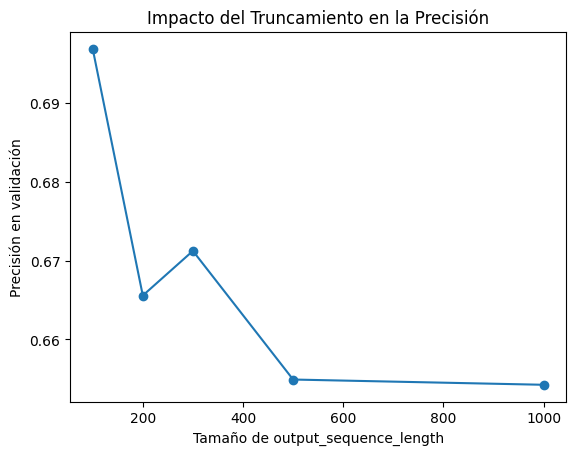

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sequence_lengths = [100, 200, 300, 500, 1000]  
val_accuracies = []

for seq_length in sequence_lengths:
    vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=20000, output_mode="int", output_sequence_length=seq_length
    )


    modelo = tf.keras.Sequential([
        tf.keras.layers.Embedding(20000, 128),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(len(class_names), activation="softmax")
    ])

    modelo.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = modelo.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val), verbose=0)

    val_accuracies.append(history.history["val_accuracy"][-1])

plt.plot(sequence_lengths, val_accuracies, marker="o")
plt.xlabel("Tamaño de output_sequence_length")
plt.ylabel("Precisión en validación")
plt.title("Impacto del Truncamiento en la Precisión")
plt.show()


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

token_counts = [len(nlp(text)) for text in train_samples] 

for seq_length in sequence_lengths:
    truncados = sum(1 for count in token_counts if count > seq_length)
    porcentaje = truncados / len(token_counts) * 100
    print(f"Tamaño {seq_length}: {truncados} textos truncados ({porcentaje:.2f}%)")


Tamaño 100: 10076 textos truncados (83.98%)
Tamaño 200: 7074 textos truncados (58.96%)
Tamaño 300: 4685 textos truncados (39.05%)
Tamaño 500: 2245 textos truncados (18.71%)
Tamaño 1000: 688 textos truncados (5.73%)


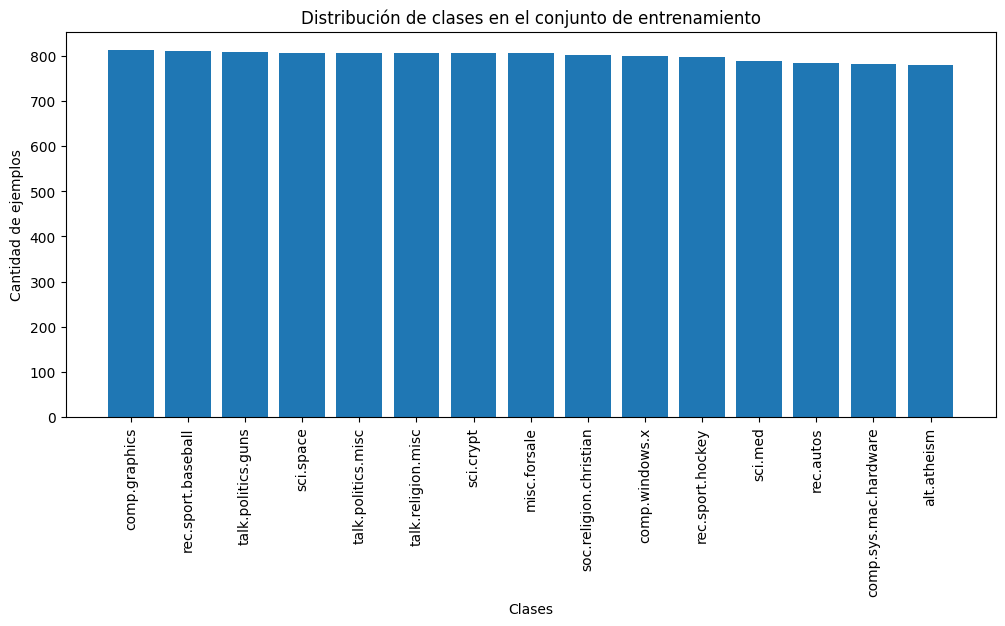

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class_counts = Counter(y_train)

sorted_classes = sorted(class_counts.keys(), key=lambda x: class_counts[x], reverse=True)
sorted_counts = [class_counts[c] for c in sorted_classes]

plt.figure(figsize=(12,5))
plt.bar(range(len(sorted_classes)), sorted_counts, tick_label=[class_names[c] for c in sorted_classes])
plt.xticks(rotation=90)
plt.xlabel("Clases")
plt.ylabel("Cantidad de ejemplos")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.show()


####Analizar los valores de cada clase

In [ ]:
from sklearn.metrics import classification_report

y_pred = modeloTransformers.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)  

print(classification_report(y_val, y_pred_classes, target_names=class_names))


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
                        precision    recall  f1-score   support

           alt.atheism       0.68      0.70      0.69       220
         comp.graphics       0.85      0.79      0.82       188
 comp.sys.mac.hardware       0.90      0.87      0.89       218
        comp.windows.x       0.91      0.83      0.87       200
          misc.forsale       0.86      0.77      0.81       194
             rec.autos       0.88      0.92      0.90       216
    rec.sport.baseball       0.96      0.92      0.94       189
      rec.sport.hockey       0.94      0.93      0.93       203
             sci.crypt       0.84      0.93      0.89       194
               sci.med       0.80      0.92      0.86       211
             sci.space       0.91      0.85      0.88       193
soc.religion.christian       0.89      0.86      0.87       196
    talk.politics.guns       0.83      0.76      0.80       191
    talk.politics.misc       0.69      0.66      0.68       193

####Textos ambiguos

In [33]:
test_texts = [
    "Este coche es una bestia",
    "Los gráficos de este partido son impresionantes",
    "Las vacunas pueden cambiar el mundo",
    "Gané la lotería, pero solo fueron 5 dólares...",
    "Este código está tan limpio que podría comer sobre él",
]

probabilities = end_to_end_model(keras.ops.convert_to_tensor([[text] for text in test_texts]))

for text, prob in zip(test_texts, probabilities):
    print(f"Texto: {text}")
    print(f"Predicción: {class_names[np.argmax(prob)]}")
    print("-" * 50)

Texto: Este coche es una bestia
Predicción: alt.atheism
--------------------------------------------------
Texto: Los gráficos de este partido son impresionantes
Predicción: sci.crypt
--------------------------------------------------
Texto: Las vacunas pueden cambiar el mundo
Predicción: rec.sport.baseball
--------------------------------------------------
Texto: Gané la lotería, pero solo fueron 5 dólares...
Predicción: rec.sport.hockey
--------------------------------------------------
Texto: Este código está tan limpio que podría comer sobre él
Predicción: alt.atheism
--------------------------------------------------


In [34]:
sarc_texts = [
    "¡Oh, claro! Seguro que la tierra es plana.",
    "Este nuevo sistema operativo nunca falla... excepto cuando lo usas.",
    "Nada mejor que un lunes por la mañana",
]

probabilities = end_to_end_model(keras.ops.convert_to_tensor([[text] for text in sarc_texts]))

for text, prob in zip(sarc_texts, probabilities):
    print(f"Texto: {text}")
    print(f"Predicción: {class_names[np.argmax(prob)]}")
    print("-" * 50)


Texto: ¡Oh, claro! Seguro que la tierra es plana.
Predicción: alt.atheism
--------------------------------------------------
Texto: Este nuevo sistema operativo nunca falla... excepto cuando lo usas.
Predicción: sci.crypt
--------------------------------------------------
Texto: Nada mejor que un lunes por la mañana
Predicción: rec.sport.hockey
--------------------------------------------------


####Tamaños

In [35]:
import numpy as np

data_sizes = [0.1, 0.3, 0.5, 1.0]

results = {}

for size in data_sizes:
    print(f"\n🔹 Entrenando con {int(size * 100)}% de los datos...\n")

    num_samples = int(len(x_train) * size)
    x_train_subset, y_train_subset = x_train[:num_samples], y_train[:num_samples]

    modeloTransformers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = modelo.fit(
        x_train_subset, y_train_subset,
        batch_size=128,
        epochs=10,
        validation_data=(x_val, y_val),
        verbose=1
    )

    val_acc = history.history["val_accuracy"][-1]
    results[f"{int(size * 100)}%"] = val_acc



🔹 Entrenando con 10% de los datos...

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7016 - loss: 1.1275 - val_accuracy: 0.7039 - val_loss: 1.1669
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7524 - loss: 1.0667 - val_accuracy: 0.6952 - val_loss: 1.1513
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7836 - loss: 1.0152 - val_accuracy: 0.6892 - val_loss: 1.1347
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8043 - loss: 0.9662 - val_accuracy: 0.6942 - val_loss: 1.1196
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8240 - loss: 0.9236 - val_accuracy: 0.6899 - val_loss: 1.1097
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8324 - loss: 0.8878 - val_accuracy: 0.6902 - val_loss: 1.0985
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8409 - loss: 0.8521 - val_accuracy: 0.6909 - val_loss: 1.0869
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8470 - 

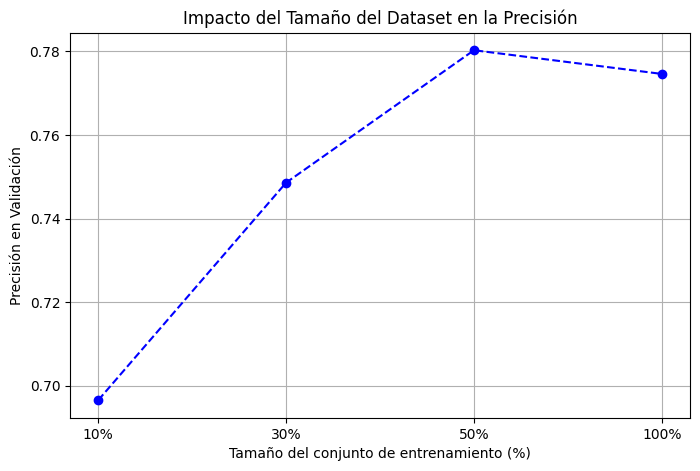

In [36]:
import matplotlib.pyplot as plt

sizes = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8,5))
plt.plot(sizes, accuracies, marker="o", linestyle="--", color="b")
plt.xlabel("Tamaño del conjunto de entrenamiento (%)")
plt.ylabel("Precisión en Validación")
plt.title("Impacto del Tamaño del Dataset en la Precisión")
plt.grid(True)
plt.show()
